IMPORT LIBRARY

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

IMPORT DATA

In [161]:
df = pd.read_csv("Dataset Bakery.csv")

df.head()
# df.info()

,ticket_number,date,time,article,Quantity,unit_price_euro
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20
2,150049,2021-01-02,9:40,CROISSANT,2,1.10
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20
4,150051,2021-01-02,9:46,PAIN,1,1.15


Pre-processing

In [162]:
print('Number of Duplicated Rows in the dataset:', df.duplicated().sum())

# Menampilkan semua baris duplikat (berdasarkan semua kolom)
duplicate_rows = df[df.duplicated(keep=False)]  # keep=False untuk menampilkan semua duplikat (termasuk baris asli)

# Menampilkan hasil
print(duplicate_rows)

Number of Duplicated Rows in the dataset: 5
      ticket_number        date   time               article  Quantity  \
112          150154  2021-01-02  12:23  TRADITIONAL BAGUETTE         1   
113          150154  2021-01-02  12:23  TRADITIONAL BAGUETTE         1   
168          150206  2021-01-02  13:17                 COUPE         1   
170          150206  2021-01-02  13:17                 COUPE         1   
506          150675  2021-01-05  12:38                 COUPE         1   
507          150675  2021-01-05  12:38                 COUPE         1   
1204         151628  2021-01-12  13:41      SANDWICH COMPLET         1   
1205         151628  2021-01-12  13:41      SANDWICH COMPLET         1   
2925         153967  2021-01-31  11:32                 COUPE         1   
2927         153967  2021-01-31  11:32                 COUPE         1   

      unit_price_euro  
112              1.20  
113              1.20  
168              0.15  
170              0.15  
506              0.15

In [163]:
df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)

print('Number of Duplicated Rows in the dataset:', df.duplicated().sum())

Number of Duplicated Rows in the dataset: 0


FINDING MISSING VALUES

In [164]:
df.isnull().sum()

ticket_number      0
date               0
time               0
article            0
Quantity           0
unit_price_euro    0
dtype: int64

In [165]:
# Misalnya, kolom 'Date' adalah kolom yang berisi data tanggal
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df


,ticket_number,date,time,article,Quantity,unit_price_euro
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20
2,150049,2021-01-02,9:40,CROISSANT,2,1.10
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20
4,150051,2021-01-02,9:46,PAIN,1,1.15
...,...,...,...,...,...,...
2990,154053,2021-01-31,13:20,TRADITIONAL BAGUETTE,1,1.20
2991,154054,2021-01-31,13:20,TRADITIONAL BAGUETTE,2,1.20
2992,154055,2021-01-31,13:34,TRADITIONAL BAGUETTE,1,1.20
2993,154056,2021-01-31,13:40,TRADITIONAL BAGUETTE,1,1.20


CREATE DAY FROM DATE

In [166]:
# Menambahkan kolom 'Day' dengan nama hari
df['day'] = df['date'].dt.day_name()
df.head()

,ticket_number,date,time,article,Quantity,unit_price_euro,day
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20,Saturday
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20,Saturday
2,150049,2021-01-02,9:40,CROISSANT,2,1.10,Saturday
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20,Saturday
4,150051,2021-01-02,9:46,PAIN,1,1.15,Saturday


In [167]:
qty = df['Quantity']
prc = df['unit_price_euro']

df['amount'] = qty * prc
df

,ticket_number,date,time,article,Quantity,unit_price_euro,day,amount
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20,Saturday,3.60
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20,Saturday,7.20
2,150049,2021-01-02,9:40,CROISSANT,2,1.10,Saturday,2.20
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20,Saturday,1.20
4,150051,2021-01-02,9:46,PAIN,1,1.15,Saturday,1.15
...,...,...,...,...,...,...,...,...
2990,154053,2021-01-31,13:20,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20
2991,154054,2021-01-31,13:20,TRADITIONAL BAGUETTE,2,1.20,Sunday,2.40
2992,154055,2021-01-31,13:34,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20
2993,154056,2021-01-31,13:40,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20


In [168]:
total_rev = df['amount'].sum()
print(total_rev)

6877.95


In [169]:
# Menambahkan kolom indeks yang menunjukkan urutan
df['Index'] = df.index + 1  # Jika ingin mulai dari 1
df

,ticket_number,date,time,article,Quantity,unit_price_euro,day,amount,Index
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20,Saturday,3.60,1
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20,Saturday,7.20,2
2,150049,2021-01-02,9:40,CROISSANT,2,1.10,Saturday,2.20,3
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20,Saturday,1.20,4
4,150051,2021-01-02,9:46,PAIN,1,1.15,Saturday,1.15,5
...,...,...,...,...,...,...,...,...,...
2990,154053,2021-01-31,13:20,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2991
2991,154054,2021-01-31,13:20,TRADITIONAL BAGUETTE,2,1.20,Sunday,2.40,2992
2992,154055,2021-01-31,13:34,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2993
2993,154056,2021-01-31,13:40,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2994


SAVED NEW DATA TO CSV

In [170]:
df.to_csv('Data Bakery Preprocess.csv', index=False)

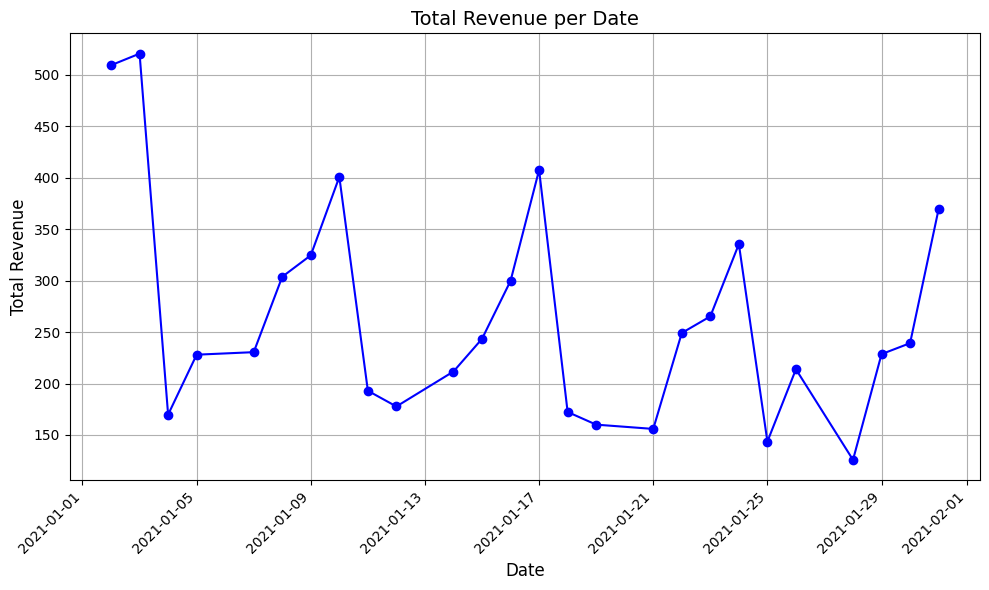

In [171]:
total_revenue_per_date = df.groupby('date')['amount'].sum().reset_index()

# Visualisasi dengan line chart
plt.figure(figsize=(10, 6))
plt.plot(total_revenue_per_date['date'], total_revenue_per_date['amount'], color='blue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Total Revenue per Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Memutar label tanggal agar terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grid
plt.grid(True)

# Menampilkan chart
plt.tight_layout()
plt.show()

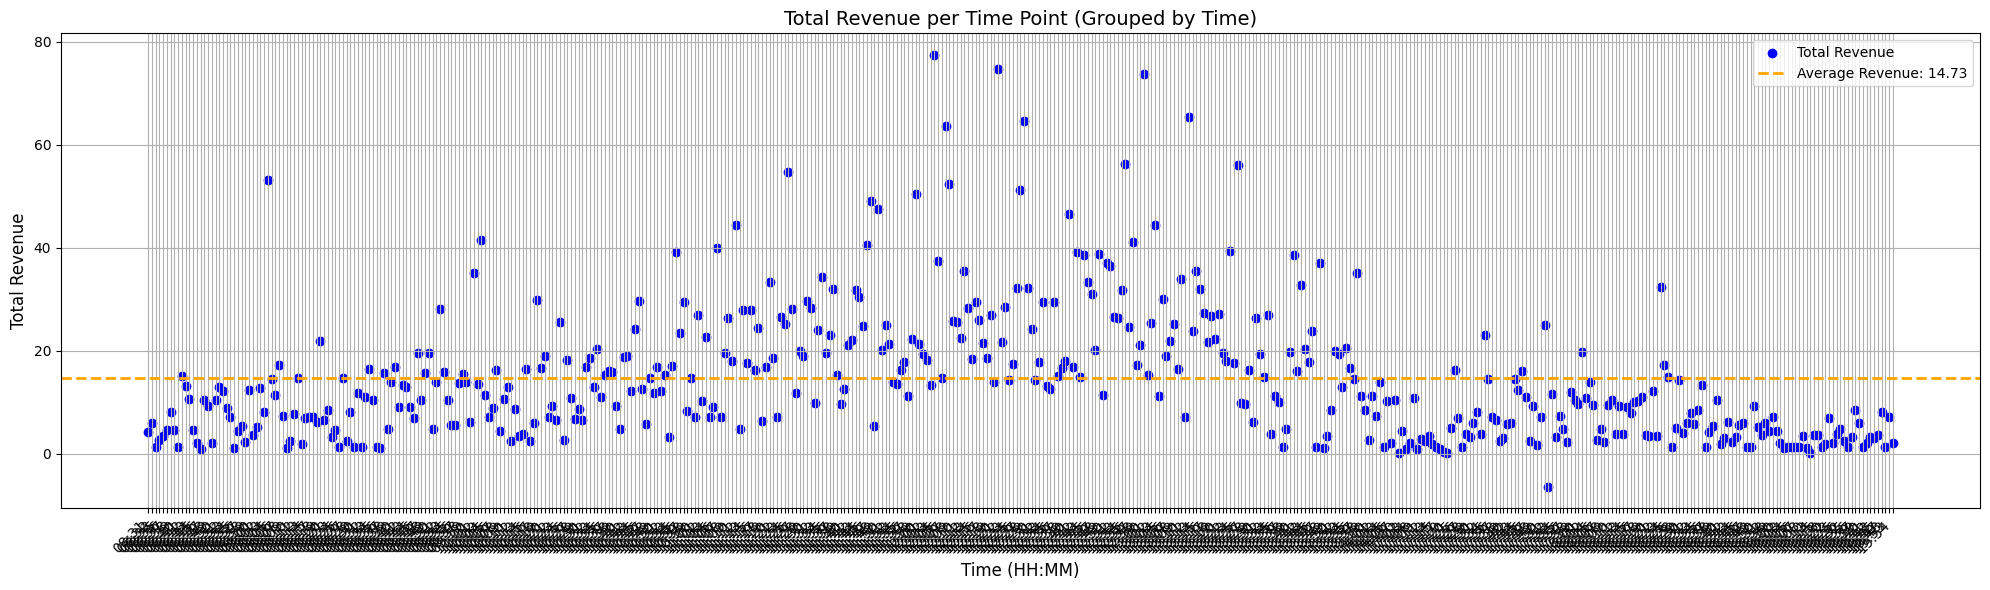

In [172]:
# Mengonversi kolom 'time' menjadi format hanya jam dan menit sebagai string
df['time'] = pd.to_datetime(df['time'], format='%H:%M').dt.strftime('%H:%M')

# Mengelompokkan data berdasarkan waktu yang sama dan menjumlahkan 'amount'
total_revenue_per_time = df.groupby('time')['amount'].sum().reset_index()

# Visualisasi dengan scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(total_revenue_per_time['time'], total_revenue_per_time['amount'], color='blue', label='Total Revenue')

# Menambahkan garis rata-rata
average_revenue = total_revenue_per_time['amount'].mean()
plt.axhline(average_revenue, color='orange', linestyle='--', linewidth=2, label=f'Average Revenue: {average_revenue:.2f}')

# Menambahkan judul dan label sumbu
plt.title('Total Revenue per Time Point (Grouped by Time)', fontsize=14)
plt.xlabel('Time (HH:MM)', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Mengatur rotasi label pada x-axis
plt.xticks(rotation=45, ha='right')

# Menampilkan grid dan legenda
plt.grid(True)
plt.legend()

# Menampilkan scatter plot
plt.tight_layout()
plt.show()


In [173]:
df

,ticket_number,date,time,article,Quantity,unit_price_euro,day,amount,Index
0,150045,2021-01-02,09:32,TRADITIONAL BAGUETTE,3,1.20,Saturday,3.60,1
1,150046,2021-01-02,09:37,TRADITIONAL BAGUETTE,6,1.20,Saturday,7.20,2
2,150049,2021-01-02,09:40,CROISSANT,2,1.10,Saturday,2.20,3
3,150049,2021-01-02,09:40,TRADITIONAL BAGUETTE,1,1.20,Saturday,1.20,4
4,150051,2021-01-02,09:46,PAIN,1,1.15,Saturday,1.15,5
...,...,...,...,...,...,...,...,...,...
2990,154053,2021-01-31,13:20,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2991
2991,154054,2021-01-31,13:20,TRADITIONAL BAGUETTE,2,1.20,Sunday,2.40,2992
2992,154055,2021-01-31,13:34,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2993
2993,154056,2021-01-31,13:40,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2994


In [174]:
descriptive_stats = total_revenue_per_date['amount'].describe()

# Print hasil statistik deskriptif
print(descriptive_stats)

count     26.000000
mean     264.536538
std      106.555999
min      125.850000
25%      181.512500
50%      234.825000
75%      319.337500
max      520.400000
Name: amount, dtype: float64


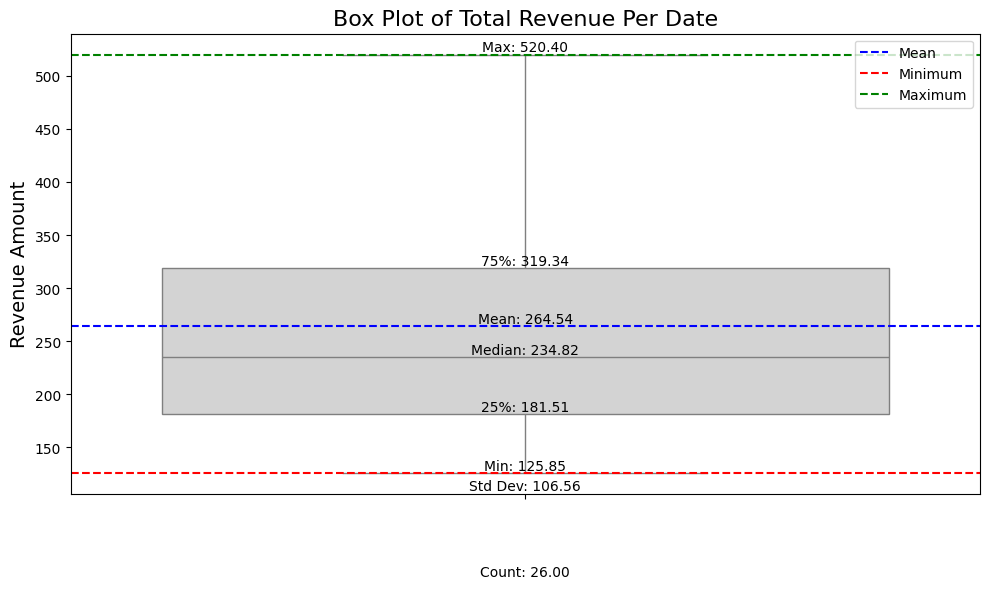

In [175]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y=total_revenue_per_date['amount'], color='lightgray')
plt.title('Box Plot of Total Revenue Per Date', fontsize=16)
plt.ylabel('Revenue Amount', fontsize=14)

# Get the descriptive statistics
descriptive_stats = total_revenue_per_date['amount'].describe()

# Define the statistics to display
statistics_to_display = {
    'Count': descriptive_stats['count'],
    'Mean': descriptive_stats['mean'],
    'Std Dev': descriptive_stats['std'],
    '25%': descriptive_stats['25%'],
    'Median': descriptive_stats['50%'],
    '75%': descriptive_stats['75%'],
    'Max': descriptive_stats['max'],
    'Min': descriptive_stats['min']
}

# Annotate the plot with the statistical values
for i, (stat_name, stat_value) in enumerate(statistics_to_display.items()):
    ax.text(0, stat_value, f'{stat_name}: {stat_value:.2f}', ha='center', va='bottom', fontsize=10)

# Add horizontal lines for Mean, Min, and Max with labels
plt.axhline(y=descriptive_stats['mean'], color='blue', linestyle='--', label='Mean')
plt.axhline(y=descriptive_stats['min'], color='red', linestyle='--', label='Minimum')
plt.axhline(y=descriptive_stats['max'], color='green', linestyle='--', label='Maximum')

# Create custom legend entries for each statistic
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [176]:
# Mengelompokkan data berdasarkan 'order_id' dan menghitung total 'quantity' untuk setiap order
quantity_per_order = df.groupby('ticket_number')['Quantity'].sum()

# Menghitung rata-rata quantity per order
average_quantity_per_order = quantity_per_order.mean()

print(f'Rata-rata pembelian per tiket/order: {average_quantity_per_order:.2f}')

Rata-rata pembelian per tiket/order: 1.87


MODELLING DATA

In [177]:
# Inisialisasi LabelEncoder untuk setiap kolom kategori
le_article = LabelEncoder()
le_day = LabelEncoder()

# Melakukan encoding dan menambahkan kolom baru untuk hasil encoding
df['article_encoded'] = le_article.fit_transform(df['article'])
df['day_encoded'] = le_day.fit_transform(df['day'])

In [178]:
# Mendefinisikan fitur dan target
X = df[['article_encoded', 'day_encoded', 'unit_price_euro']]
y = df['Quantity']

# Membagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1.29
R-squared: 0.13


In [179]:
new_data = pd.DataFrame({
    'article_encoded': le_article.transform(['TRADITIONAL BAGUETTE', 'SPECIAL BREAD', 'KOUIGN AMANN']),  # artikel dalam bentuk numerik
    'day_encoded': le_day.transform(['Saturday', 'Monday', 'Saturday']),  # hari dalam bentuk numerik
    'unit_price_euro': [1.20, 2.40, 2.1]      # harga satuan artikel
})

predicted_quantity = model.predict(new_data)
print(f'Prediksi Kuantitas Terjual: {predicted_quantity}')

Prediksi Kuantitas Terjual: [1.62729104 1.         1.42186508]


In [180]:
import random
import pandas as pd

new_data = {
    'ticket_number': [],
    'date': [],
    'time': [],
    'article': [],
    'Quantity': [],
    'unit_price_euro': [],
    'day': [],
    'amount': []
}

# Daftar artikel dan harga
articles = ['TRADITIONAL BAGUETTE', 'CROISSANT', 'SPECIAL BREAD', 'PAIN AU CHOCOLAT', 'CINNAMON ROLL']
unit_prices = [1.20, 1.10, 2.40, 1.50, 2.00]
day = 'Saturday'

# Generate 20 data baru
for i in range(100):
    ticket_number = 150047 + i  # Menambah ticket_number secara berurutan
    date = '2021-01-02'  # Tanggal tetap
    time = f"{random.randint(9, 18)}:{random.randint(0, 59):02d}"  # Menghasilkan waktu acak antara 09:00 dan 18:59
    article = random.choice(articles)  # Memilih artikel secara acak
    quantity = random.randint(1, 10)  # Kuantitas acak antara 1 dan 10
    unit_price = random.choice(unit_prices)  # Memilih harga unit secara acak
    amount = quantity * unit_price  # Menghitung total amount

    # Menambahkan data baru ke list
    new_data['ticket_number'].append(ticket_number)
    new_data['date'].append(date)
    new_data['time'].append(time)
    new_data['article'].append(article)
    new_data['Quantity'].append(quantity)
    new_data['unit_price_euro'].append(unit_price)
    new_data['day'].append(day)
    new_data['amount'].append(amount)

# Buat DataFrame untuk data baru
df_new_data = pd.DataFrame(new_data)

# Menggabungkan dataset lama dan data baru
df_combined = pd.concat([df, df_new_data], ignore_index=True)

# Konversi kolom 'date' ke format datetime untuk memastikan hanya menyimpan 'YYYY-MM-DD'
df_combined['date'] = pd.to_datetime(df_combined['date']).dt.strftime('%Y-%m-%d')

# Mengonversi kolom 'time' ke format datetime, lalu kembali ke format jam dan menit
df_combined['time'] = pd.to_datetime(df_combined['time'], format='%H:%M', errors='coerce').dt.strftime('%H:%M')

# Menyimpan df_combined ke dalam CSV
df_combined.to_csv("Data Bakery Preprocess.csv", index=False)

# Menampilkan hasil gabungan untuk memastikan hasil akhir
print(df_combined)


      ticket_number        date   time               article  Quantity  \
0            150045  2021-01-02  09:32  TRADITIONAL BAGUETTE         3   
1            150046  2021-01-02  09:37  TRADITIONAL BAGUETTE         6   
2            150049  2021-01-02  09:40             CROISSANT         2   
3            150049  2021-01-02  09:40  TRADITIONAL BAGUETTE         1   
4            150051  2021-01-02  09:46                  PAIN         1   
...             ...         ...    ...                   ...       ...   
3090         150142  2021-01-02  16:25         SPECIAL BREAD         9   
3091         150143  2021-01-02  16:26  TRADITIONAL BAGUETTE         3   
3092         150144  2021-01-02  09:51             CROISSANT         5   
3093         150145  2021-01-02  10:09      PAIN AU CHOCOLAT         5   
3094         150146  2021-01-02  12:50         SPECIAL BREAD         8   

      unit_price_euro       day  amount  Index  article_encoded  day_encoded  
0                1.20  Saturday 

In [181]:
df

,ticket_number,date,time,article,Quantity,unit_price_euro,day,amount,Index,article_encoded,day_encoded
0,150045,2021-01-02,09:32,TRADITIONAL BAGUETTE,3,1.20,Saturday,3.60,1,68,2
1,150046,2021-01-02,09:37,TRADITIONAL BAGUETTE,6,1.20,Saturday,7.20,2,68,2
2,150049,2021-01-02,09:40,CROISSANT,2,1.10,Saturday,2.20,3,17,2
3,150049,2021-01-02,09:40,TRADITIONAL BAGUETTE,1,1.20,Saturday,1.20,4,68,2
4,150051,2021-01-02,09:46,PAIN,1,1.15,Saturday,1.15,5,47,2
...,...,...,...,...,...,...,...,...,...,...,...
2990,154053,2021-01-31,13:20,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2991,68,3
2991,154054,2021-01-31,13:20,TRADITIONAL BAGUETTE,2,1.20,Sunday,2.40,2992,68,3
2992,154055,2021-01-31,13:34,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2993,68,3
2993,154056,2021-01-31,13:40,TRADITIONAL BAGUETTE,1,1.20,Sunday,1.20,2994,68,3
